In [39]:
import os
os.getcwd()

'/Users/pjk/Wunderkammer/AntheiaWorkshop/notebooks'

In [40]:
import pycaret
pycaret.__version__

'3.3.2'

In [41]:
import sklearn
sklearn.__version__

'1.4.2'

In [42]:
import pandas as pd
from pycaret.regression import *

In [43]:
df = pd.read_csv('../data/DropOut_SummaryData.csv')
df01 = df.dropna()
df01_A = df01[df01['strain'] == 'Strain A']
df02 = df01_A.drop(['Unnamed: 0', 'strain', 'type_of_doe', 'plate', 'condition', 'residual_glucose'], axis=1)
df02.reset_index(drop = True, inplace = True)

In [44]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [45]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [46]:
df02.columns

Index(['p_h', 'glucose_g_l', 'ammonium_sulfate_g_l', 'phosphate_citrate_x',
       'ynb_x', 'amino_acid_1_m_m', 'amino_acid_2_g_l', 'amino_acid_2_g_l_1',
       'ethanol_g_l', 'mean_calc_OD60'],
      dtype='object')

In [47]:
# init setup on exp
exp.setup(df02, target = 'mean_calc_OD60', session_id = 42, experiment_name = 'DropOutPyCaret')

,Description,Value
0,Session id,42
1,Target,mean_calc_OD60
2,Target type,Regression
3,Original data shape,"(120, 10)"
4,Transformed data shape,"(120, 10)"
5,Transformed train set shape,"(84, 10)"
6,Transformed test set shape,"(36, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [48]:
# compare baseline models
best = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.8131,1.4211,1.0860,-0.0436,0.1669,0.1734,0.2220
lar,Least Angle Regression,0.8131,1.4211,1.0860,-0.0436,0.1669,0.1734,0.0020
lightgbm,Light Gradient Boosting Machine,0.8746,1.5654,1.1309,-0.0883,0.1903,0.2685,0.0350
llar,Lasso Least Angle Regression,0.8798,1.7056,1.1830,-0.1050,0.1959,0.2748,0.0020
lasso,Lasso Regression,0.8798,1.7056,1.1830,-0.1050,0.1959,0.2748,0.0850
ridge,Ridge Regression,0.8171,1.2461,1.0569,-0.1306,0.1665,0.1905,0.0020
omp,Orthogonal Matching Pursuit,0.8957,1.7207,1.1939,-0.1332,0.1971,0.2759,0.0020
en,Elastic Net,0.8678,1.6930,1.1831,-0.1778,0.1955,0.2695,0.0860
dummy,Dummy Regressor,0.9867,2.0038,1.2932,-0.2848,0.2104,0.3018,0.0020
knn,K Neighbors Regressor,0.8989,1.6646,1.1817,-0.3146,0.1938,0.2652,0.0030


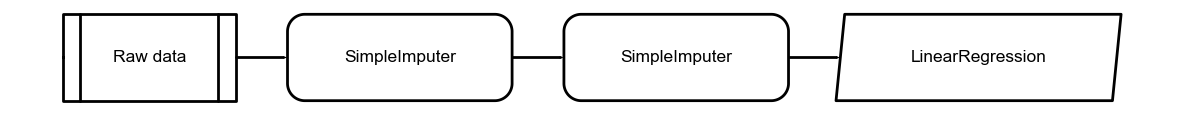

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [49]:
exp.evaluate_model(best)

In [50]:
pred_holdout = exp.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.8778,1.9288,1.3888,0.1982,0.3058,0.7704


In [51]:
exp.save_model(best, 'DropOutPycaretBest_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['p_h', 'glucose_g_l',
                                              'ammonium_sulfate_g_l',
                                              'phosphate_citrate_x', 'ynb_x',
                                              'amino_acid_1_m_m',
                                              'amino_acid_2_g_l',
                                              'amino_acid_2_g_l_1',
                                              'ethanol_g_l'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', LinearRegression(n_jobs=-1))]),
 'DropOutPycaretBest_pipeline.pkl')

In [52]:
new_data = df02.copy().drop('mean_calc_OD60', axis = 1)

In [53]:
predictions = exp.predict_model(best, data = new_data)

In [54]:
predictions

,p_h,glucose_g_l,ammonium_sulfate_g_l,phosphate_citrate_x,ynb_x,amino_acid_1_m_m,amino_acid_2_g_l,amino_acid_2_g_l_1,ethanol_g_l,prediction_label
0,4.5,35,3.0,0.2,1.250,3.5,0.50,0.0,5.0,9.643951
1,4.5,15,12.0,0.2,2.000,0.1,0.25,0.5,5.0,7.350193
2,4.5,15,3.0,1.0,2.000,0.1,0.50,0.0,2.5,6.012545
3,4.5,25,12.0,1.0,2.000,3.5,0.00,0.0,0.0,5.336658
4,4.5,35,7.5,1.0,0.500,0.1,0.50,0.5,0.0,5.264358
...,...,...,...,...,...,...,...,...,...,...
115,4.5,25,3.0,1.0,1.000,3.5,0.00,0.0,3.0,6.774228
116,4.5,15,3.0,1.0,0.500,3.5,0.00,0.0,0.0,5.526894
117,4.5,15,3.0,1.0,0.625,3.5,0.00,0.0,0.0,5.605371
118,4.5,15,3.0,1.0,1.000,3.5,0.00,0.0,0.0,5.840799


In [55]:
df02

,p_h,glucose_g_l,ammonium_sulfate_g_l,phosphate_citrate_x,ynb_x,amino_acid_1_m_m,amino_acid_2_g_l,amino_acid_2_g_l_1,ethanol_g_l,mean_calc_OD60
0,4.5,35,3.0,0.2,1.250,3.5,0.50,0.0,5.0,6.626620
1,4.5,15,12.0,0.2,2.000,0.1,0.25,0.5,5.0,8.661971
2,4.5,15,3.0,1.0,2.000,0.1,0.50,0.0,2.5,7.967703
3,4.5,25,12.0,1.0,2.000,3.5,0.00,0.0,0.0,6.598677
4,4.5,35,7.5,1.0,0.500,0.1,0.50,0.5,0.0,7.104252
...,...,...,...,...,...,...,...,...,...,...
115,4.5,25,3.0,1.0,1.000,3.5,0.00,0.0,3.0,6.700047
116,4.5,15,3.0,1.0,0.500,3.5,0.00,0.0,0.0,3.427074
117,4.5,15,3.0,1.0,0.625,3.5,0.00,0.0,0.0,5.802922
118,4.5,15,3.0,1.0,1.000,3.5,0.00,0.0,0.0,6.006952


In [56]:
df02['mean_calc_OD60']

0      6.626620
1      8.661971
2      7.967703
3      6.598677
4      7.104252
         ...   
115    6.700047
116    3.427074
117    5.802922
118    6.006952
119    8.631808
Name: mean_calc_OD60, Length: 120, dtype: float64

In [57]:
predictions['prediction_label']

0      9.643951
1      7.350193
2      6.012545
3      5.336658
4      5.264358
         ...   
115    6.774228
116    5.526894
117    5.605371
118    5.840799
119    7.364427
Name: prediction_label, Length: 120, dtype: float32

In [58]:
results = pd.DataFrame({
    "pred": predictions['prediction_label'],
    "expt": df02['mean_calc_OD60']
})

In [59]:
from plotnine import *

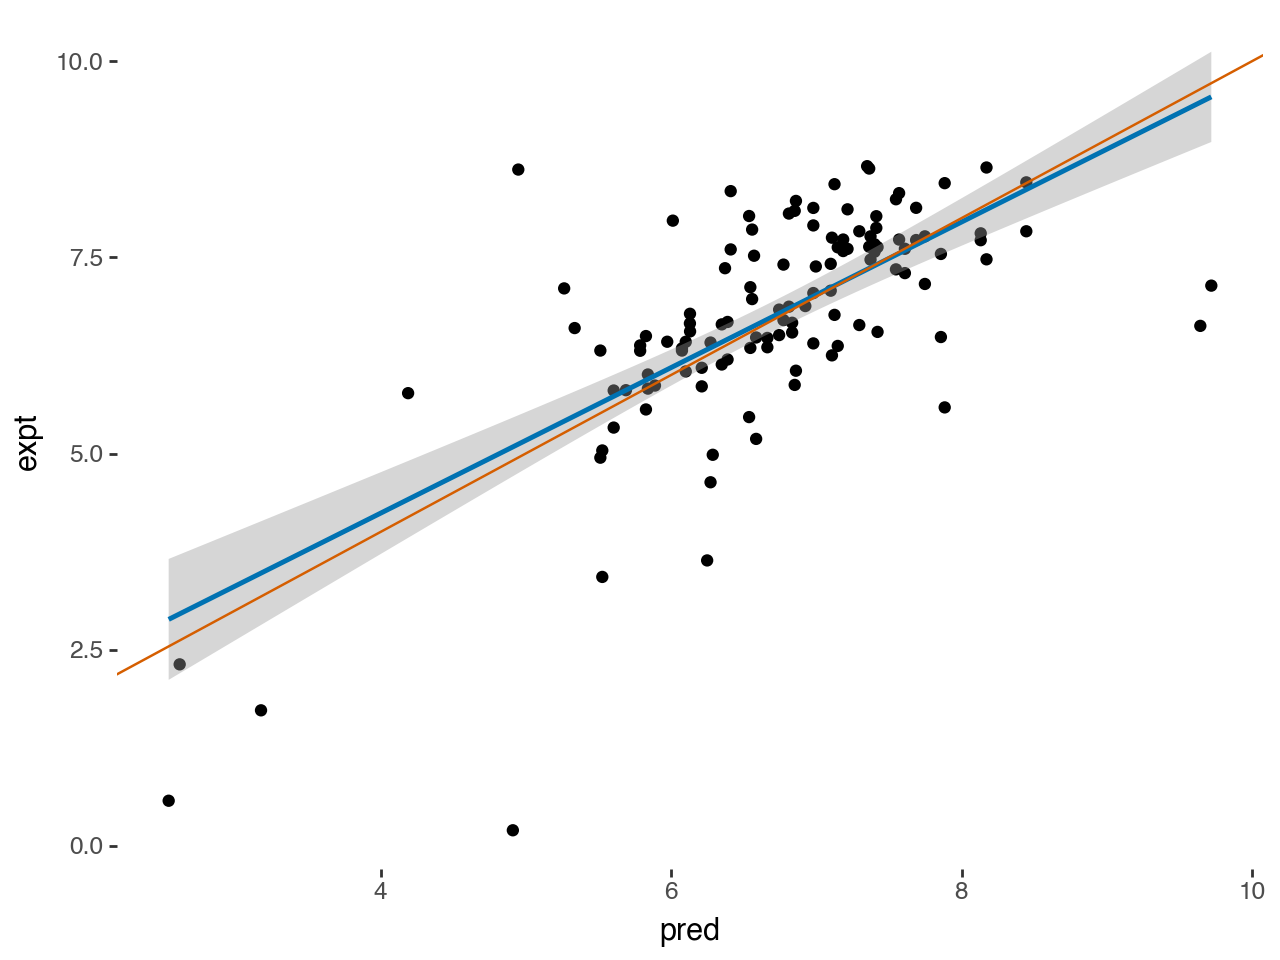

In [60]:
(
    ggplot(results, aes(x = 'pred', y = 'expt'))
    + geom_point() + geom_smooth(method = "lm", color = '#0072b2') +
    geom_abline(intercept = 0, slope = 1, color = '#d55e00') +
    theme_tufte()
)

In [61]:
results.head()

,pred,expt
0,9.643951,6.626620
1,7.350193,8.661971
2,6.012545,7.967703
3,5.336658,6.598677
4,5.264358,7.104252


In [62]:
results['residual'] = results['pred'] - results['expt']

In [63]:
results.head()

,pred,expt,residual
0,9.643951,6.626620,3.017331
1,7.350193,8.661971,-1.311778
2,6.012545,7.967703,-1.955158
3,5.336658,6.598677,-1.262019
4,5.264358,7.104252,-1.839894


In [64]:
alles = results.reset_index()

In [65]:
alles.head()

,index,pred,expt,residual
0,0,9.643951,6.626620,3.017331
1,1,7.350193,8.661971,-1.311778
2,2,6.012545,7.967703,-1.955158
3,3,5.336658,6.598677,-1.262019
4,4,5.264358,7.104252,-1.839894


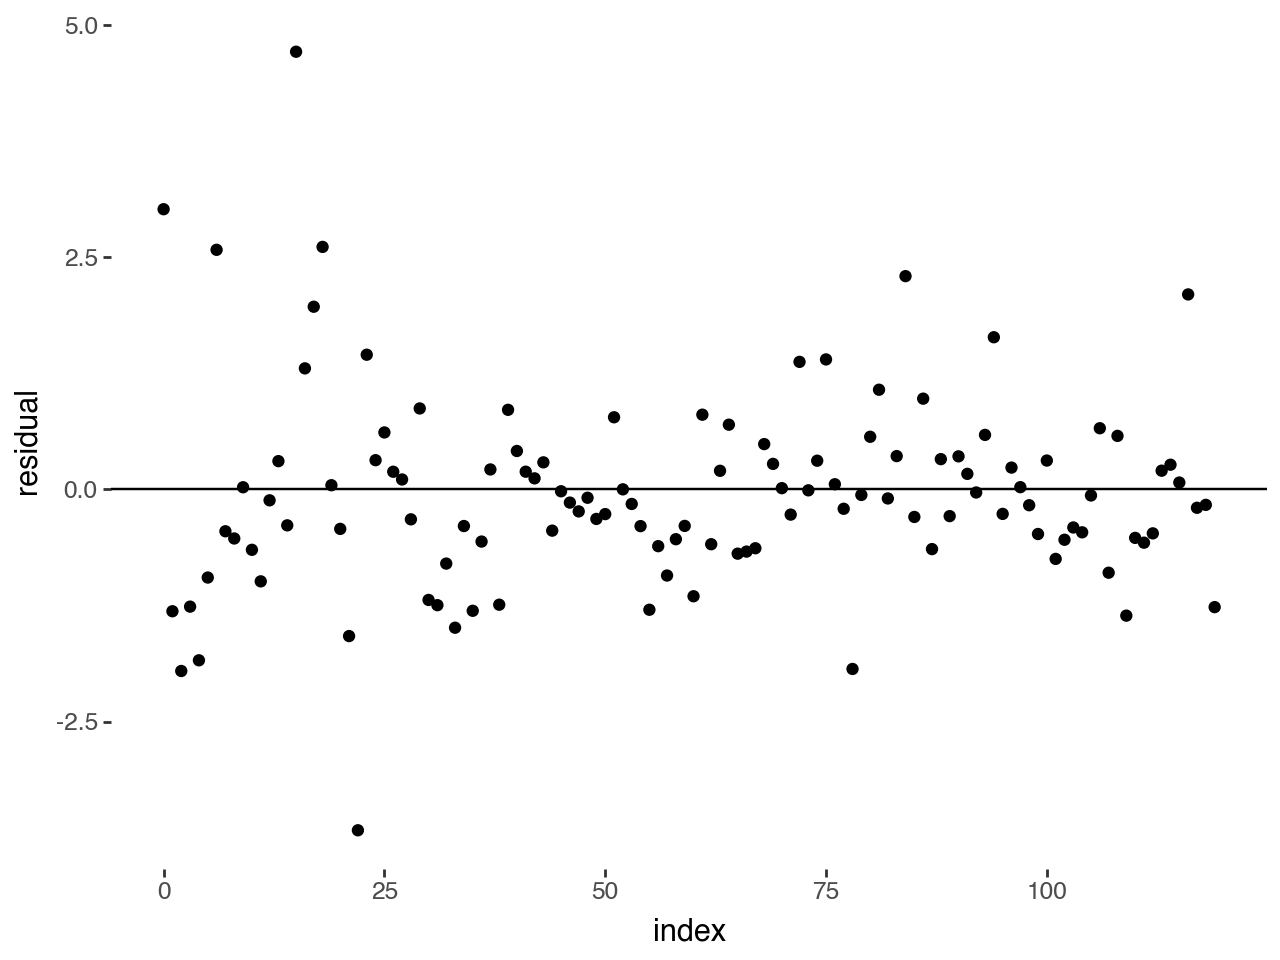

In [66]:
(
    ggplot(alles, aes(x = 'index', y = 'residual')) +
    geom_point() +
    geom_hline(yintercept = 0.0) +
    theme_tufte()
)

In [71]:
qaz = setup(df02, target = 'mean_calc_OD60', session_id = 42)

cb = create_model('catboost')

,Description,Value
0,Session id,42
1,Target,mean_calc_OD60
2,Target type,Regression
3,Original data shape,"(120, 10)"
4,Transformed data shape,"(120, 10)"
5,Transformed train set shape,"(84, 10)"
6,Transformed test set shape,"(36, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4874,0.7100,0.8426,0.2313,0.1086,0.0670
1,1.1178,1.6253,1.2749,-0.3868,0.1834,0.1785
2,0.7230,0.7872,0.8873,-2.6665,0.1144,0.1068
3,1.6776,6.3566,2.5212,-0.1987,0.5882,1.4084
4,0.6805,0.7373,0.8586,0.4298,0.1257,0.1191
5,0.9568,1.4536,1.2057,0.0832,0.1772,0.1807
6,0.7670,0.7429,0.8619,0.3807,0.1123,0.1117
7,1.2188,1.9757,1.4056,0.4975,0.2355,0.2619
8,1.0223,1.3722,1.1714,-0.9132,0.1456,0.1481


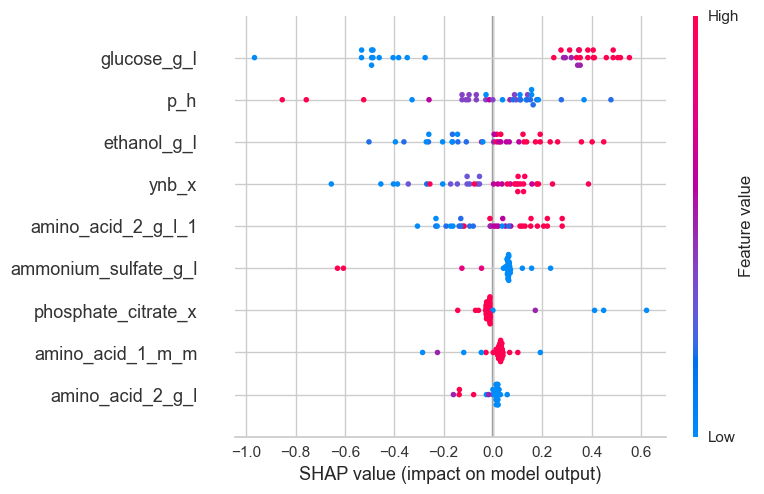

In [72]:
interpret_model(cb)

In [73]:
interpret_model(cb, plot = 'reason', observation = 0)

In [74]:
interpret_model(cb, plot = 'reason')

In [75]:
from explainerdashboard import ClassifierExplainer, RegressionExplainer

In [76]:
explainer = RegressionExplainer(cb, get_config('X_test_transformed'), get_config('y_test_transformed'))

Generating self.shap_explainer = shap.TreeExplainer(model)


In [77]:
from explainerdashboard import ExplainerDashboard

In [78]:
from explainerdashboard import InlineExplainer

In [79]:
ExplainerDashboard(explainer, simple=True).run()

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Generating layout...
Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.246:8050


Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


In [38]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}